notebook:
https://www.kaggle.com/aherparesh/loan-defaulter

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('../data/loan_default'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/loan_default/test.csv
../data/loan_default/train.csv


In [2]:
data = pd.read_csv('../data/loan_default/train.csv')
datatest = pd.read_csv('../data/loan_default/train.csv')

In [14]:
datatest.describe()

,Unnamed: 0,minority,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability
count,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.000000,480000.00000,480000.000000
mean,3999.500000,0.499652,0.500000,0.474990,26.021746,42.986927,96223.628123,5005.001956,2.999743,14.50000,45.993240
std,2309.403464,0.500000,0.500001,0.499375,24.549403,14.426379,91722.295324,2887.151223,1.000970,8.65545,45.072000
min,0.000000,0.000000,0.000000,0.000000,0.002336,18.000059,7.311613,0.043818,-12.463088,0.00000,0.005395
25%,1999.750000,0.000000,0.000000,0.000000,1.680126,30.465951,6181.591559,2503.583897,2.615404,7.00000,1.671442
50%,3999.500000,0.000000,0.500000,0.000000,20.281134,42.996289,70380.187806,5008.803098,3.307469,14.50000,31.241399
75%,5999.250000,1.000000,1.000000,1.000000,49.707804,55.466158,183477.240519,7503.316593,3.712350,22.00000,89.451288
max,7999.000000,1.000000,1.000000,1.000000,89.305327,67.999967,350173.898532,9999.994862,4.000000,29.00000,149.914946


In [20]:
data.columns

Index(['Unnamed: 0', 'minority', 'sex', 'ZIP', 'rent', 'education', 'age',
       'income', 'loan_size', 'payment_timing', 'year', 'job_stability',
       'default', 'occupation'],
      dtype='object')

In [4]:
# null values?
data.isnull()

,Unnamed: 0,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,occupation
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
479996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
479997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
479998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
print('maximum income: {}'.format(data['income'].max()))
print('minimum income: {}'.format(data['income'].min()))
print('mean income: {}'.format(data['income'].mean()))
print('median income: {}'.format(data['income'].median()))

maximum income: 350173.8985322349
minimum income: 7.311612636410421
mean income: 96223.62812336923
median income: 70380.18780614546


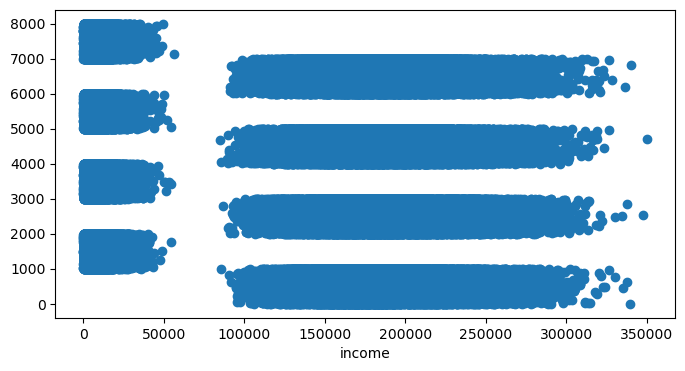

In [16]:
# Outliers
import matplotlib.pyplot as plt; plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(data['income'], data['Unnamed: 0'])
ax.set_xlabel('income')
plt.show()

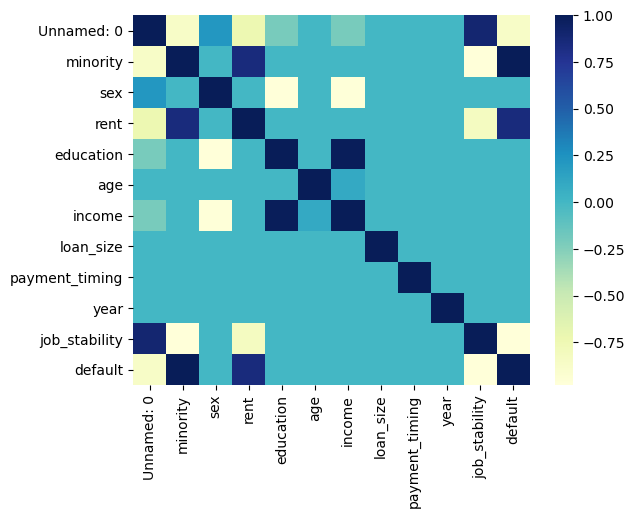

In [17]:
# import numpy as np; np.random.seed(0)
import seaborn as sns
cor= data.corr()
ax = sns.heatmap(cor, cmap="YlGnBu")

In [15]:
data['default'].value_counts()

False    240073
True     239927
Name: default, dtype: int64

In [18]:
x = ['True','False']
y_pos = np.arange(len(val))
plt.bar(y_pos, val, align='center', alpha=0.5)
plt.xticks(y_pos,x)
plt.title('Defaulter')
plt.show()

NameError: name 'val' is not defined

In [19]:
np.arange(len(val))

NameError: name 'val' is not defined

In [23]:
data['label'] = ['1' if star == True else '0' for star in data['default']];
data

,Unnamed: 0,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,occupation,label
0,0,1,0,MT04PA,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,3.015554,True,MZ10CD,1
1,1,1,0,MT04PA,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,5.938132,True,MZ10CD,1
2,2,1,0,MT04PA,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,2.190777,True,MZ10CD,1
3,3,1,0,MT04PA,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,1.725860,True,MZ10CD,1
4,4,1,0,MT04PA,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,0.883104,True,MZ10CD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479995,7995,0,1,MT12RA,0,2.369373,41.293106,8815.714070,5292.581537,3.553048,29,116.756104,False,MZ01CD,0
479996,7996,0,1,MT12RA,0,1.498832,65.684268,6272.399894,2891.865447,1.108729,29,98.036246,False,MZ01CD,0
479997,7997,0,1,MT12RA,0,0.834500,47.864323,3228.155841,9133.092048,3.504306,29,117.541660,False,MZ01CD,0
479998,7998,0,1,MT12RA,0,0.682569,47.144039,2630.080190,5000.246037,3.655282,29,103.059916,False,MZ01CD,0


In [26]:
cols = [0,3,11,12,13] # Unnamed, ZIP, job_stability, occupation
data.drop(data.columns[cols],axis=1,inplace=True)
data.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,label
0,1,0,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,1
1,1,0,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,1
2,1,0,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,1
3,1,0,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,1
4,1,0,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,1


In [27]:
data.columns

Index(['minority', 'sex', 'rent', 'education', 'age', 'income', 'loan_size',
       'payment_timing', 'year', 'label'],
      dtype='object')

In [28]:
datanew = pd.get_dummies(data)
datanew

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,label_0,label_1
0,1,0,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,0,1
1,1,0,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,0,1
2,1,0,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,0,1
3,1,0,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,0,1
4,1,0,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
479995,0,1,0,2.369373,41.293106,8815.714070,5292.581537,3.553048,29,1,0
479996,0,1,0,1.498832,65.684268,6272.399894,2891.865447,1.108729,29,1,0
479997,0,1,0,0.834500,47.864323,3228.155841,9133.092048,3.504306,29,1,0
479998,0,1,0,0.682569,47.144039,2630.080190,5000.246037,3.655282,29,1,0


In [32]:
X = datanew.iloc[:, 0:9] # take alles except label
Y = datanew['label_1']

In [ ]:
### Test dataset

In [35]:
datatest= pd.read_csv('../data/loan_default/test.csv')
datatest

,Unnamed: 0,Unnamed: 0.1,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,job_stability,year,default,occupation
0,0,0,1,0,MT04PA,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,True,MZ10CD
1,1,1,0,0,MT04PA,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,False,MZ01CD
2,2,2,0,0,MT04PA,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,False,MZ01CD
3,3,3,1,0,MT04PA,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,False,MZ10CD
4,4,4,1,0,MT04PA,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,False,MZ10CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,159995,7995,0,1,MT12RA,0,52.870499,20.013553,158421.675519,1325.315567,3.561940,98.012059,49,False,MZ01CD
159996,159996,7996,0,1,MT12RA,0,47.928770,49.105852,186633.585503,4470.150590,3.364815,81.323488,49,False,MZ01CD
159997,159997,7997,1,1,MT12RA,0,39.637948,65.372574,165690.696544,8062.143776,3.880407,111.569970,49,False,MZ11CD
159998,159998,7998,1,1,MT12RA,0,53.646738,18.154397,155517.216520,8873.519133,3.533323,110.030919,49,False,MZ11CD


In [36]:
datatest.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'minority', 'sex', 'ZIP', 'rent',
       'education', 'age', 'income', 'loan_size', 'payment_timing',
       'job_stability', 'year', 'default', 'occupation'],
      dtype='object')

In [37]:
# remove unnecessary columns
cols = [0, 1, 4, 11, 14]
datatest.drop(datatest.columns[cols],axis=1,inplace=True)
datatest.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,default
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,30,True
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,30,False
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,30,False
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,30,False
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,30,False


In [38]:
datatest.columns

Index(['minority', 'sex', 'rent', 'education', 'age', 'income', 'loan_size',
       'payment_timing', 'year', 'default'],
      dtype='object')

In [39]:
# adding a labe;
datatest['label'] = ['1' if star == True else '0' for star in datatest['default']];
datatest

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,default,label
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,30,True,1
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,30,False,0
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,30,False,0
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,30,False,0
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,30,False,0
...,...,...,...,...,...,...,...,...,...,...,...
159995,0,1,0,52.870499,20.013553,158421.675519,1325.315567,3.561940,49,False,0
159996,0,1,0,47.928770,49.105852,186633.585503,4470.150590,3.364815,49,False,0
159997,1,1,0,39.637948,65.372574,165690.696544,8062.143776,3.880407,49,False,0
159998,1,1,0,53.646738,18.154397,155517.216520,8873.519133,3.533323,49,False,0


In [40]:
# remove default
cols = [9]
datatest.drop(datatest.columns[cols], axis=1, inplace=True)
datatest.head()

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,label
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,30,1
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,30,0
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,30,0
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,30,0
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,30,0


In [41]:
datatestnew = pd.get_dummies(datatest)
datatestnew

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,label_0,label_1
0,1,0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,30,0,1
1,0,0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,30,1,0
2,0,0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,30,1,0
3,1,0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,30,1,0
4,1,0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,30,1,0
...,...,...,...,...,...,...,...,...,...,...,...
159995,0,1,0,52.870499,20.013553,158421.675519,1325.315567,3.561940,49,1,0
159996,0,1,0,47.928770,49.105852,186633.585503,4470.150590,3.364815,49,1,0
159997,1,1,0,39.637948,65.372574,165690.696544,8062.143776,3.880407,49,1,0
159998,1,1,0,53.646738,18.154397,155517.216520,8873.519133,3.533323,49,1,0


In [42]:
Xtest = datatestnew.iloc[:, :9]
Ytest = datatestnew['label_1']

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, Y)
model.score(X, Y)
predicted= model.predict(Xtest)

/Users/ilkayisik/miniconda3/envs/her_hackathon/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Ytest, predicted))
print('\n')
print(classification_report(Ytest, predicted))
model.score(X,Y)

[[104517  31538]
 [ 16402   7543]]


              precision    recall  f1-score   support

           0       0.86      0.77      0.81    136055
           1       0.19      0.32      0.24     23945

    accuracy                           0.70    160000
   macro avg       0.53      0.54      0.53    160000
weighted avg       0.76      0.70      0.73    160000



0.9776729166666667

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
model1= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model1.fit(X,Y)
predicted= model1.predict(Xtest)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Ytest, predicted))
print('\n')
print(classification_report(Ytest, predicted))
model1.score(X,Y)

[[67783 68272]
 [11869 12076]]


              precision    recall  f1-score   support

           0       0.85      0.50      0.63    136055
           1       0.15      0.50      0.23     23945

    accuracy                           0.50    160000
   macro avg       0.50      0.50      0.43    160000
weighted avg       0.75      0.50      0.57    160000



0.9985416666666667